<a href="https://colab.research.google.com/github/iamdas3/Machine-Learning/blob/master/200birds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir .kaggle

In [ ]:
import json
token = {'username':'trideepdas42291','key':'6a1a0886f367c6d9302074aa0917d240'}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d gpiosenka/100-bird-species

 99% 1.17G/1.19G [00:22<00:00, 60.7MB/s]
100% 1.19G/1.19G [00:22<00:00, 57.7MB/s]


In [ ]:
import os
import zipfile

local_zip = '/content/100-bird-species.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/valid/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=128
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=32
)

Found 27503 images belonging to 200 classes.
Found 1000 images belonging to 200 classes.


In [ ]:
pretrained_model = tf.keras.applications.Xception(
        weights='imagenet',
        include_top=False ,
        input_shape=[224,224, 3]
)
pretrained_model.trainable = False
    
model = tf.keras.Sequential([
        # To a base pretrained on ImageNet to extract features from images...
    pretrained_model,
        # ... attach a new head to act as a classifier.
        #tf.keras.layers.Conv2D(512, [3,3], activation='relu'),
        #tf.keras.layers.MaxPooling2D(2,2),
        #tf.keras.layers.Conv2D(512, [3,3], activation='relu'),
        #tf.keras.layers.MaxPooling2D(2,2),
        #tf.keras.layers.Flatten(),
        #tf.keras.layers.Dense(512, activation='relu'),

        #tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(200, activation='softmax')
])
model.compile(
        optimizer='adam',
        loss = 'categorical_crossentropy',
        metrics=['accuracy'],
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 7, 7, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               409800    
Total params: 21,271,280
Trainable params: 409,800
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
history = model.fit(train_generator, epochs=10, steps_per_epoch=27503/128, validation_data = validation_generator, verbose = 1, validation_steps=1000/32)

Epoch 1/10
215/214 [==============================] - 309s 1s/step - loss: 2.0267 - accuracy: 0.5911 - val_loss: 0.7405 - val_accuracy: 0.8460
Epoch 2/10
215/214 [==============================] - 303s 1s/step - loss: 0.9251 - accuracy: 0.7793 - val_loss: 0.4666 - val_accuracy: 0.9010
Epoch 3/10
215/214 [==============================] - 302s 1s/step - loss: 0.7302 - accuracy: 0.8175 - val_loss: 0.3850 - val_accuracy: 0.9170
Epoch 4/10
215/214 [==============================] - 304s 1s/step - loss: 0.6413 - accuracy: 0.8348 - val_loss: 0.3241 - val_accuracy: 0.9190
Epoch 5/10
215/214 [==============================] - 303s 1s/step - loss: 0.5777 - accuracy: 0.8482 - val_loss: 0.3038 - val_accuracy: 0.9180
Epoch 6/10
215/214 [==============================] - 303s 1s/step - loss: 0.5247 - accuracy: 0.8605 - val_loss: 0.2823 - val_accuracy: 0.9280
Epoch 7/10
215/214 [==============================] - 311s 1s/step - loss: 0.4931 - accuracy: 0.8686 - val_loss: 0.2680 - val_accuracy: 0.9240

In [ ]:
model.save("/tmp/200_birds_model_Xception.h5")

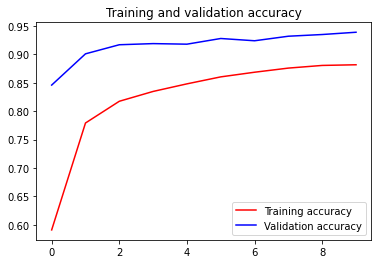

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
TESTING_DIR = "/tmp/test/"
testing_datagen = ImageDataGenerator(rescale = 1./255)
testing_generator = testing_datagen.flow_from_directory(
	TESTING_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=32
)

Found 1000 images belonging to 200 classes.


In [ ]:
model.evaluate(testing_generator, steps=1000/32, verbose=1)

32/31 [==============================] - 3s 79ms/step - loss: 0.1635 - accuracy: 0.9600


[0.1635074019432068, 0.9599999785423279]